In [1]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import datetime

In [2]:
# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC',
 'Micron':'MU',
 'Advanced Micro Devices':'AMD'
}
companies = sorted(companies_dict.items(), key=lambda x: x[1])


In [3]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2020-01-01'
end_date = '2021-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'IBM'),
            ('Adj Close',  'TXN'),
            ...
            (   'Volume',  'JNJ'),
            (   'Volume',   'TM'),
            (   'Volume',  'HMC'),
            (   'Volume',  'XOM'),
            (   'Volume',  '

In [4]:

# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AMZN    1898.010010
AAPL      75.087502
WBA       59.080002
NOC      355.700012
BA       333.320007
LMT      399.369995
MCD      200.789993
INTC      60.840000
IBM      135.419998
TXN      129.570007
MA       303.390015
MSFT     160.619995
GE        95.440002
AXP      125.849998
PEP      135.820007
KO        54.990002
JNJ      145.970001
TM       142.240005
HMC       28.639999
XOM       70.900002
CVX      121.430000
VLO       95.129997
F          9.420000
BAC       35.639999
MU        55.389999
AMD       49.099998
Name: 2020-01-02 00:00:00, dtype: float64


In [5]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [6]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


Company: Apple, Change: -37.7210693359375
Company: Advanced Micro Devices, Change: 20.089900970458984
Company: Amazon, Change: -8.780040740966797
Company: American Express, Change: -50.6697998046875
Company: Boeing, Change: -252.5400161743164
Company: Bank of America, Change: -72.8797607421875
Company: Chevron, Change: 25.690216064453125
Company: Ford, Change: 6.959972381591797
Company: General Electric, Change: -7.24005126953125
Company: Honda, Change: 19.860069274902344
Company: IBM, Change: -35.29954528808594
Company: Intel, Change: 29.32000732421875
Company: Johnson & Johnson, Change: -45.1999626159668
Company: Coca Cola, Change: -15.679901123046875
Company: Lockheed Martin, Change: 14.610031127929688
Company: MasterCard, Change: -12.35000991821289
Company: McDonalds, Change: -6.1299591064453125
Company: Microsoft, Change: -27.309959411621094
Company: Micron, Change: -4.210004806518555
Company: Northrop Grumman, Change: -36.27995300292969
Company: Pepsi, Change: -32.509979248046875

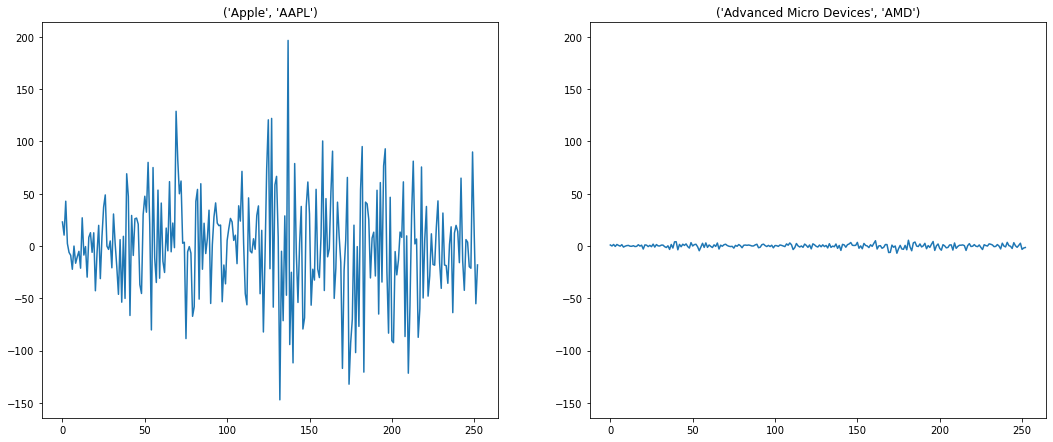

In [7]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [8]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.33509889947166854
-0.4122829830627484
-0.002170705090850018


In [9]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [10]:
panel_data

Attributes    Adj Close                                                 \
Symbols            AMZN        AAPL        WBA         NOC          BA   
Date                                                                     
2020-01-02  1898.010010   74.096451  55.026276  345.170349  331.348572   
2020-01-03  1874.969971   73.376083  55.026276  363.908691  330.791901   
2020-01-06  1902.880005   73.960762  55.501278  364.704468  331.766083   
2020-01-07  1906.859985   73.612923  55.221863  363.869965  335.285156   
2020-01-08  1891.969971   74.797081  51.999264  359.328461  329.410095   
...                 ...         ...        ...         ...         ...   
2020-12-24  3172.689941  131.352829  38.531334  295.626495  217.149994   
2020-12-28  3283.959961  136.050781  38.570240  299.001099  216.089996   
2020-12-29  3322.000000  134.239273  38.327103  296.998047  216.250000   
2020-12-30  3285.850098  133.094666  38.259029  298.596527  216.669998   
2020-12-31  3256.929932  132.069473  38.784191  300.678589  214.059998   

Attributes                                                             ...  \
Symbols            LMT         MCD       INTC         IBM         TXN  ...   
Date                                                                   ...   
2020-01-02  381.058105  192.579193  58.265907  124.142937  123.730919  ...   
2020-01-03  394.769226  191.898239  57.557220  123.152855  122.088425  ...   
2020-01-06  394.168091  194.056213  57.394413  122.932846  121.238533  ...   
2020-01-07  395.494324  194.343964  56.436722  123.015350  123.578117  ...   
2020-01-08  392.183472  197.489838  56.475033  124.042076  123.912346  ...   
...                ...         ...        ...         ...         ...  ...   
2020-12-24  344.455902  207.804062  46.199394  120.301132  158.897644  ...   
2020-12-28  346.618744  210.389450  46.199394  120.426559  158.730515  ...   
2020-12-29  346.344727  209.101685  48.476486  119.442467  158.445435  ...   
2020-12-30  346.599182  207.971176  47.848320  119.963455  159.939651  ...   
2020-12-31  347.401642  210.939957  48.898533  121.449242  161.345398  ...   

Attributes     Volume                                                        \
Symbols           JNJ        TM       HMC         XOM        CVX        VLO   
Date                                                                          
2020-01-02  5777000.0  118100.0  262800.0  12456400.0  5205000.0  2130500.0   
2020-01-03  5752400.0  174900.0  663600.0  17386900.0  6360900.0  5057000.0   
2020-01-06  7731300.0  150200.0  463000.0  20081900.0  9953000.0  3393200.0   
2020-01-07  7382900.0  123500.0  341800.0  17387700.0  7856900.0  3795500.0   
2020-01-08  6605800.0  117700.0  264200.0  15137700.0  7295900.0  4101800.0   
...               ...       ...       ...         ...        ...        ...   
2020-12-24  2114900.0  150200.0  209700.0   8039000.0  3335600.0  1352000.0   
2020-12-28  3855500.0  215600.0  516200.0  23877500.0  8051900.0  2450600.0   
2020-12-29  5212000.0  265100.0  474300.0  20287700.0  7670800.0  2470800.0   
2020-12-30  5412800.0  193500.0  656600.0  23807300.0  7901800.0  2732100.0   
2020-12-31  5099900.0  160000.0  370600.0  22786500.0  8350700.0  2537700.0   

Attributes                                                  
Symbols              F         BAC          MU         AMD  
Date                                                        
2020-01-02  43425700.0  37614200.0  20173200.0  80331100.0  
2020-01-03  45040800.0  50357900.0  16815800.0  73127400.0  
2020-01-06  43372300.0  42185000.0  18768700.0  47934900.0  
2020-01-07  44984100.0  34149000.0  49908200.0  58061400.0  
2020-01-08  45994900.0  45311600.0  29730800.0  53767000.0  
...                ...         ...         ...         ...  
2020-12-24  27927000.0  22632300.0   4848500.0  16705900.0  
2020-12-28  38068400.0  32861200.0   8345200.0  30627300.0  
2020-12-29  37537900.0  33291900.0   9403400.0  31748200.0  
2020-12-30  38461900.0  2637010

In [11]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [12]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                      companies
21       0                   (Toyota, TM)
20       0                   (Pepsi, PEP)
19       0        (Northrop Grumman, NOC)
0        1                  (Apple, AAPL)
25       1                   (Exxon, XOM)
6        2                 (Chevron, CVX)
8        2         (General Electric, GE)
18       2                   (Micron, MU)
17       2              (Microsoft, MSFT)
15       3               (MasterCard, MA)
14       3         (Lockheed Martin, LMT)
16       3               (McDonalds, MCD)
23       4           (Valero Energy, VLO)
22       4       (Texas Instruments, TXN)
13       4                (Coca Cola, KO)
3        5        (American Express, AXP)
5        5         (Bank of America, BAC)
11       6                  (Intel, INTC)
10       6                     (IBM, IBM)
1        6  (Advanced Micro Devices, AMD)
9        6                   (Honda, HMC)
2        7                 (Amazon, AMZN)
4        8                   (Boei

In [13]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=4)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labbels
print(df.sort_values('labels'))

    labels                      companies
10       0                     (IBM, IBM)
18       0                   (Micron, MU)
6        0                 (Chevron, CVX)
7        0                      (Ford, F)
9        0                   (Honda, HMC)
17       0              (Microsoft, MSFT)
24       0                (Walgreen, WBA)
2        1                 (Amazon, AMZN)
3        1        (American Express, AXP)
5        1         (Bank of America, BAC)
8        1         (General Electric, GE)
16       1               (McDonalds, MCD)
15       1               (MasterCard, MA)
14       1         (Lockheed Martin, LMT)
19       2        (Northrop Grumman, NOC)
12       2       (Johnson & Johnson, JNJ)
22       2       (Texas Instruments, TXN)
20       2                   (Pepsi, PEP)
4        2                   (Boeing, BA)
23       2           (Valero Energy, VLO)
13       2                (Coca Cola, KO)
21       2                   (Toyota, TM)
0        3                  (Apple

In [14]:
reduced_data


array([[ 0.62731403, -0.35847172],
       [ 0.48698645, -0.29390616],
       [-0.05552851,  0.38870407],
       [ 0.12272413,  0.57152577],
       [-0.34760928, -0.10117634],
       [ 0.12203178,  0.53660827],
       [ 0.02949056, -0.14360466],
       [ 0.32548303, -0.01012724],
       [-0.08502833,  0.20311377],
       [ 0.28626514, -0.14972326],
       [ 0.08902888, -0.13924575],
       [ 0.50417011, -0.1995878 ],
       [-0.42935898, -0.00287649],
       [-0.42608807, -0.16189762],
       [ 0.29483017,  0.38236617],
       [ 0.02045646,  0.39500569],
       [ 0.22275527,  0.44167183],
       [-0.02253806,  0.09268212],
       [-0.07562099,  0.08255554],
       [-0.46519679, -0.15271775],
       [-0.4202178 , -0.24288016],
       [-0.46498596, -0.18070768],
       [-0.50230741, -0.18455496],
       [-0.3476014 , -0.02176142],
       [-0.00683973, -0.28527394],
       [ 0.51738531, -0.46572028]])

In [15]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(26, 2)


,PC 1,PC 2
0,0.627314,-0.358472
1,0.486986,-0.293906
2,-0.055529,0.388704
3,0.122724,0.571526
4,-0.347609,-0.101176
5,0.122032,0.536608
6,0.029491,-0.143605
7,0.325483,-0.010127
8,-0.085028,0.203114
9,0.286265,-0.149723


C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


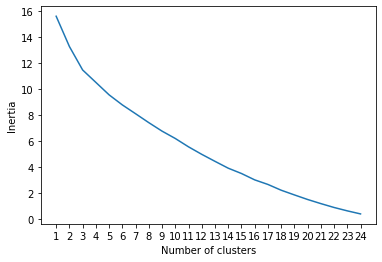

In [16]:
# Initialize empty inertia list
inertia = []
# Initialize k range
k = list(range(1,25))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,25))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Figure size 432x288 with 0 Axes>

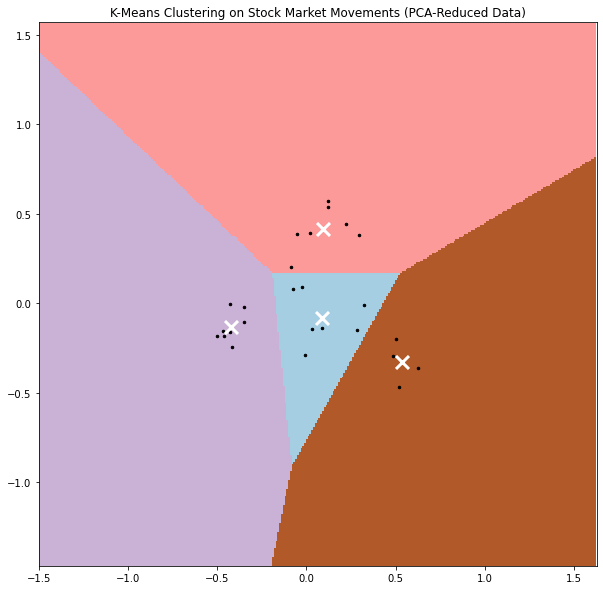

In [17]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()